# Set Membership

In [44]:
from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


In [67]:
class Node:
    def __init__(self, key, color=True):
        self.key = key
        self.color = color
        self.left = None
        self.right = None

def find_bottom_node(tree):
    '''Traverse the given tree to find the bottom (i.e., the deepest) node'''
    node = tree.root
    while node.left is not None or node.right is not None:
        if node.right is not None:
            node = node.right
        else:
            node = node.left
    return node

def print_tree(node, level=0):
    '''Print the given tree in a readable format'''
    if node is not None:
        print_tree(node.right, level + 1)
        print(" " * 4 * level + "->", node.key, node.color)
        print_tree(node.left, level + 1)

class HashFunctions:
    def __init__(self, length, r=31, fold_length=2, chr_size=256):
        '''Initialisation function for HashFunctions class
        
        Args:
            length (int): Length of the hash table
            r (int, optional): Base for the hash function. Defaults to 31.
            fold_length (int, optional): Length of the substring to be folded. Defaults to 2.
            chr_size (int, optional): Size of the character set. Defaults to 256.
        '''
        self.r = r
        self.fold_length = fold_length
        self.chr_size = chr_size
        self.length = length
        self.functions = [self.basic_hash, self.folding_hash]
        
    def basic_hash(self, s):
        '''Basic hash function
        
        Args:
            s (str): String to be hashed
        '''
        M = self.length
        hsh = 0
        for i in range(0, len(s)):
            hsh = (self.r * hsh + ord(s[i]))
        return hsh % M

    def folding_hash(self, s):
        '''Folding hash function
        
        Args:
            s (str): String to be hashed
        '''
        M = self.length
        hsh = 0
        mul = 1
        for i in range(0, len(s)):
            if i % self.fold_length == 0:
                mul = 1
            else:
                mul = mul * self.chr_size
            hsh = hsh + ord(s[i]) * mul
        return hsh % M

    def multiplicative_hash(self, s):
        '''Multiplicative hash function
        
        Args:
            s (str): String to be hashed
        '''
        M = self.length
        a = 164419 # Some large prime
        hsh = 0
        for i in range(0, len(s)):
            hsh = self.r * hsh
            val = a * ord(s[i])
            hsh ^= val
        hsh = hsh % self.chr_size
        hsh = int(M * (float(hsh) / self.chr_size))
        return hsh

    def polynomial_hash(self, s):
        '''Polynomial hash function
        
        Args:
            s (str): String to be hashed
        '''
        M = self.length
        hsh = 0
        for i in range(0, len(s)):
            hsh = hsh + ord(s[i]) * (self.r ** i)
        return hsh % M


**sequential search**.

In [46]:
class SequentialSearchSet(AbstractSet):

    def __init__(self):
        # ADD YOUR CODE HERE
        self.setList = []

    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        if element not in self.setList:
            self.setList.append(element)
            inserted = True 
        
        return inserted 

    def searchElement(self, element):
        found = False
        # ADD YOUR CODE HERE
        for i in self.setList:
            if i == element:
                found = True
                break
        return found

**binary search tree**.

In [56]:
class BinarySearchTreeSet(AbstractSet): 
          
    def __init__(self):
        # ADD YOUR CODE HERE
        self.root = None  
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        current = self.root
        if current is None:
            self.root = Node(element)
            inserted = True
        else:
            while True:
                entry = current.key
                if element < entry:
                    if current.left is None:
                        current.left = Node(element)
                        inserted = True
                        break
                    current = current.left
                elif element > entry:
                    if current.right is None:
                        current.right = Node(element)
                        inserted = True
                        break
                    current = current.right
                else:
                    current.key = element
                    break
        return inserted

    
    def searchElement(self, element):
        found = False

        current = self.root
        while current is not None and not found:
            if element == current.key:
                found = True
            elif element < current.key:
                current = current.left
            else:
                current = current.right

        return found

**balanced search tree**.

In [52]:
class BalancedSearchTreeSet(AbstractSet):
  
    def __init__(self):
        self.root = None
    
    def insertElement(self, element):
        inserted = False
        
        if self.searchElement(element):
            inserted = False
            return inserted
        else:
            self.root = self._insert(self.root, element)
            self.root.color = True
            inserted = True
        
        return inserted
    
    def searchElement(self, element):
        found = False
        
        current = self.root
        while current is not None and not found:
            if element == current.key:
                found = True
            elif element < current.key:
                current = current.left
            else:
                current = current.right

        return found
    

    def _insert(self, node, element):
        if node is None:
            return Node(element, False)
        
        if element < node.key:
            node.left = self._insert(node.left, element)
        else:
            node.right = self._insert(node.right, element)
        
        if self._isRed(node.right) and not self._isRed(node.left):
            node = self._rotateLeft(node)
        if self._isRed(node.left) and self._isRed(node.left.left):
            node = self._rotateRight(node)
        if self._isRed(node.left) and self._isRed(node.right):
            self._flipColors(node)
        
        return node
    
    def _isRed(self, node):
        if node is None:
            return False
        else:
            return node.color == False
    
    def _rotateLeft(self, node):
        x = node.right
        node.right = x.left
        x.left = node
        x.color = node.color
        node.color = False
        return x
    
    def _rotateRight(self, node):
        x = node.left
        node.left = x.right
        x.right = node
        x.color = node.color
        node.color = False
        return x
    
    def _flipColors(self, node):
        node.color = not node.color
        node.left.color = not node.left.color
        node.right.color = not node.right.color

**bloom filter**.

In [49]:
class BloomFilterSet(AbstractSet):
    def __init__(self):
        #based on 1000 elements
        self.size = 50771
        self.bits = [False] * self.size
        self.hash_functions = HashFunctions(self.size)

    def insertElement(self, element):
        inserted = False
        
        for function in self.hash_functions.functions:
            index = function(element)
            self.bits[index] = True
        
        # if all(self.bits[function(element) % self.size] for function in self.hash_functions.functions):
        inserted = True
        
        return inserted
    
    def searchElement(self, element):
        found = False

        for function in self.hash_functions.functions:
            index = function(element)
            if not self.bits[index]:
                found = False
                return found
        found = True
    
        return found

**synthetic data generator**

In [50]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.alphabet = string.ascii_lowercase       
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = []
        for _ in range(size):
            #ensure consistent data set size
            while True:
              #create random string of length 1-10 from lowercase alphabet
              str = "".join(random.choices(self.alphabet, k=random.randint(1, 10)))
              if str not in data:
                  data.append(str)
                  break
        return data
        

**Evaluation of the implementations**

In [53]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
with open ("test1-mobydick.txt", 'r') as file1:
    text1 = file1.read()

    words_file1 = text1.split()

with open ("test2-warpeace.txt", 'r') as file2:
    text2 = file2.read()

    words_file2 = text1.split()

with open ("test3-dickens.txt", 'r') as file3:
    text3 = file3.read()

    words_file3 = text3.split()
    
with open ("test-search.txt", 'r') as searchFile:
    text4 = searchFile.read()

    search_words = text4.split()

def real_data_analsyis(search_set, word_list, search_word_list):
    '''Returns the insertion and search times for a given set and word list
    
    Args:
        search_set (AbstractSet): The set to be used for the analysis
        word_list (list): The list of words to be inserted into the set
        search_word_list (list): The list of words to be searched in the set
        
    Returns:
        (float, float): The insertion and search times for the given set and word list
    '''
    insertion_time = timeit.timeit(lambda: [search_set.insertElement(element) for element in word_list], number=1)
    search_time = timeit.timeit(lambda: [search_set.searchElement(element) for element in search_word_list], number=1)
    
    return (insertion_time, search_time)

def print_real_analysis():
    '''Prints the results of the real data analysis'''

    #SequentialSearch
    print("Sequential search: \n")

    sequential_insertion_time_file_1, sequential_search_time_file_1 = real_data_analsyis(SequentialSearchSet(), words_file1, search_words)
    print (f"Sequential search total insertion time for {file1.name}:", sequential_insertion_time_file_1, "seconds.")
    print (f"Sequential search total search time for {file1.name}:", sequential_search_time_file_1, "seconds.\n")

    sequential_insertion_time_file_2, sequential_search_time_file_2 = real_data_analsyis(SequentialSearchSet(), words_file2, search_words)
    print (f"Sequential search total insertion time for {file2.name}:", sequential_insertion_time_file_2, "seconds.")
    print (f"Sequential search total search time for {file2.name}:", sequential_search_time_file_2, "seconds.\n")

    sequential_insertion_time_file_3, sequential_search_time_file_3 = real_data_analsyis(SequentialSearchSet(), words_file3, search_words)
    print (f"Sequential search total insertion time for {file3.name}:", sequential_insertion_time_file_3, "seconds.")
    print (f"Sequential search total search time for {file3.name}:", sequential_search_time_file_3, "seconds.")

    print('-' * 50)

    #BinarySearch
    print("Binary search: \n")

    binary_insertion_time_file_1, binary_search_time_file_1 = real_data_analsyis(BinarySearchTreeSet(), words_file1, search_words)
    print (f"Binary search total insertion time for {file1.name}:", binary_insertion_time_file_1, "seconds.")
    print (f"Binary search total search time for {file1.name}:", binary_search_time_file_1, "seconds.\n")

    binary_insertion_time_file_2, binary_search_time_file_2 = real_data_analsyis(BinarySearchTreeSet(), words_file2, search_words)
    print (f"Binary search total insertion time for {file2.name}:", binary_insertion_time_file_2, "seconds.")
    print (f"Binary search total search time for {file2.name}:", binary_search_time_file_2, "seconds.\n")

    binary_insertion_time_file_3, binary_search_time_file_3 = real_data_analsyis(BinarySearchTreeSet(), words_file3, search_words)
    print (f"Binary search total insertion time for {file3.name}:", binary_insertion_time_file_3, "seconds.")
    print (f"Binary search total search time for {file3.name}:", binary_search_time_file_3, "seconds.")

    print('-' * 50)

    #BalancedSearch
    print("Balanced Tree Search \n")

    balanced_insertion_time_file_1, balanced_search_time_file_1 = real_data_analsyis(BalancedSearchTreeSet(), words_file1, search_words)
    print (f"Balanced tree search total insertion time for {file1.name}:", balanced_insertion_time_file_1, "seconds.")
    print (f"Balanced tree search total search time for {file1.name}:", balanced_search_time_file_1, "seconds.\n")

    balanced_insertion_time_file_2, balanced_search_time_file_2 = real_data_analsyis(BalancedSearchTreeSet(), words_file2, search_words)
    print (f"Balanced tree search total insertion time for {file2.name}:", balanced_insertion_time_file_2, "seconds.")
    print (f"Balanced tree search total search time for {file2.name}:", balanced_search_time_file_2, "seconds.\n")

    balanced_insertion_time_file_3, balanced_search_time_file_3 = real_data_analsyis(BalancedSearchTreeSet(), words_file3, search_words)
    print (f"Balanced tree search total insertion time for {file3.name}:", balanced_insertion_time_file_3, "seconds.")
    print (f"Balanced tree search total search time for {file3.name}:", balanced_search_time_file_3, "seconds.")

    print('-' * 50)

    # BloomFilter
    print("Bloom filter : \n")

    bloom_insertion_time_file_1, bloom_search_time_file_1 = real_data_analsyis(BloomFilterSet(), words_file1, search_words)
    print (f"Bloom filter total insertion time for {file1.name}:", bloom_insertion_time_file_1, "seconds.")
    print (f"Bloom filter total search time for {file1.name}:", bloom_search_time_file_1, "seconds.\n")

    bloom_insertion_time_file_2, bloom_search_time_file_2 = real_data_analsyis(BloomFilterSet(), words_file2, search_words)
    print (f"Bloom filter total insertion time for {file2.name}:", bloom_insertion_time_file_2, "seconds.")
    print (f"Bloom filter total search time for {file2.name}:", bloom_search_time_file_2, "seconds.\n")

    bloom_insertion_time_file_3, bloom_search_time_file_3 = real_data_analsyis(BloomFilterSet(), words_file3, search_words)
    print (f"Bloom filter total insertion time for {file3.name}:", bloom_insertion_time_file_3, "seconds.")
    print (f"Bloom filter total search time for {file3.name}:", bloom_search_time_file_3, "seconds.")

print_real_analysis()


Sequential search: 

Sequential search total insertion time for test1-mobydick.txt: 3.515226375000566 seconds.
Sequential search total search time for test1-mobydick.txt: 0.04059291600060533 seconds.

Sequential search total insertion time for test2-warpeace.txt: 3.5274235420001787 seconds.
Sequential search total search time for test2-warpeace.txt: 0.041621000000304775 seconds.

Sequential search total insertion time for test3-dickens.txt: 253.7792807090009 seconds.
Sequential search total search time for test3-dickens.txt: 0.16088316600144026 seconds.
--------------------------------------------------
Binary search: 

Binary search total insertion time for test1-mobydick.txt: 0.18094125000061467 seconds.
Binary search total search time for test1-mobydick.txt: 0.0005568750002566958 seconds.

Binary search total insertion time for test2-warpeace.txt: 0.18516554099915083 seconds.
Binary search total search time for test2-warpeace.txt: 0.0005392920011217939 seconds.

Binary search total 

In [75]:
#TEST CODE FOR SYNTHETIC DATA

def test_empty_set_case():
    '''
    Test the empty set for the search algorithms
    '''
    # Test empty set
    empty_set = SequentialSearchSet()
    assert empty_set.searchElement("test") == False

    # Test empty set
    empty_set = BinarySearchTreeSet()
    assert empty_set.searchElement("test") == False

    # Test empty set
    empty_set = BalancedSearchTreeSet()
    assert empty_set.searchElement("test") == False

    # Test empty set
    empty_set = BloomFilterSet()
    assert empty_set.searchElement("test") == False

def test_duplicate_case():
    '''
    Test duplicate handling for the search algorithms
    '''
    # Test duplicate
    duplicate_set = SequentialSearchSet()
    duplicate_set.insertElement("test")
    duplicate_set.insertElement("test")
    assert duplicate_set.searchElement("test") == True

    # Test duplicate
    duplicate_set = BinarySearchTreeSet()
    duplicate_set.insertElement("test")
    duplicate_set.insertElement("test")
    assert duplicate_set.searchElement("test") == True

    # Test duplicate
    duplicate_set = BalancedSearchTreeSet()
    duplicate_set.insertElement("test")
    duplicate_set.insertElement("test")
    assert duplicate_set.searchElement("test") == True

    # Test duplicate
    duplicate_set = BloomFilterSet()
    duplicate_set.insertElement("test")
    duplicate_set.insertElement("test")
    assert duplicate_set.searchElement("test") == True

def test_not_in_set_case():
    '''
    Test not in set case for the search algorithms
    '''
    # Test not in set
    not_in_set = SequentialSearchSet()
    not_in_set.insertElement("test")
    assert not_in_set.searchElement("test2") == False

    # Test not in set
    not_in_set = BinarySearchTreeSet()
    not_in_set.insertElement("test")
    assert not_in_set.searchElement("test2") == False

    # Test not in set
    not_in_set = BalancedSearchTreeSet()
    not_in_set.insertElement("test")
    assert not_in_set.searchElement("test2") == False

    # Test not in set
    not_in_set = BloomFilterSet()
    not_in_set.insertElement("test")
    assert not_in_set.searchElement("test2") == False

def test_edge_cases():
    test_empty_set_case()
    test_duplicate_case()
    test_not_in_set_case()
    print("All edge case tests passed!")

def measure_insert_time(search_set, element):
    '''
    Measure the time it takes to insert an element into a given set
    
    Parameters:
      search_set (AbstractSet): The set to be used for inserting
      element (str): The element to be inserted
      
    Returns:
      (float): The time it takes to insert the given element into the given set
    '''
    return timeit.timeit(lambda: search_set.insertElement(element), number=1)

def measure_search_time(search_set, element):
    '''
    Measure the time it takes to search for an element in a given set
    
    Parameters:
      search_set (AbstractSet): The set to be used for searching
      element (str): The element to be searched for
      
    Returns:
      (float): The time it takes to search for the given element in the given set
    '''
    return timeit.timeit(lambda: search_set.searchElement(element), number=1)

def average_insert_time(search_set, data, span=10):
    '''
    Average insert time for span number of random elements in a given data set

    Parameters:
      search_set (AbstractSet): The set to be tested
      data (list): The data set to be used for testing
      span (int): The number of insertions to be tested

    Returns:
      (float, list): The average insert time and a list of all insert times
    '''
    insert_times = []
    for _ in range(span):
        k = random.randrange(len(data))
        insert_times.append(measure_insert_time(search_set, data[k]))
    return (sum(insert_times)/len(insert_times), insert_times)

def average_search_time(search_set, data, span=5):
    '''
    Average search time for span number of random elements in a given data set
    
    Parameters:
      search_set (AbstractSet): The set to be tested
      data (list): The data set to be used for testing
      span (int): The number of searches to be tested
    
    Returns:
      (float, list): The average search time and a list of all search times
    '''
    search_times = []
    for _ in range(span):
        k = random.randrange(len(data))
        search_times.append(measure_search_time(search_set, data[k]))
    return (sum(search_times)/len(search_times), search_times)

def sequential_worst_case_synthetic_analysis(search_set, size):
    '''
    Worst case analysis of insert and search time for sequential search
    
    Parameters:
      insert_set (AbstractSet): The set to be tested
      size (int): The size of the data set to be used for testing
    
    Returns:
      ((float, list), (float, list)): The average insert time and a list of all insert times, and the average search time and a list of all search times
    '''
    generator = TestDataGenerator()
    data = generator.generateData(size)
    data.sort()

    #worst case insert is when element is not already present in the list, at O(n) where n is the size of the list
    insert_times = []
    search_times = []
    for i in range(size):
        #ensure value being inserted is not in data
        insert_times.append(measure_insert_time(search_set, data[i]))

        #ensure value being searched is not in data
        value = "".join(random.choices(string.ascii_lowercase, k=random.randint(11, 12)))
        while value in data:
            value = "".join(random.choices(string.ascii_lowercase, k=random.randint(11, 12)))
        
        search_times.append(measure_search_time(search_set, value))
        
    return (sum(insert_times)/len(insert_times), insert_times), (sum(search_times)/len(search_times), search_times)

def binary_search_worst_case_synthetic_analysis(search_set, size):
    '''Worst case analysis of insert and search for binary trees
    
    Parameters:
      search_set (AbstractSet): The set to be tested
      size (int): The size of the data set to be used for testing
      
    Returns:
      ((float, list), (float, list)): The average insert time and a list of all insert times, and the average search time and a list of all search times
    '''
    generator = TestDataGenerator()
    data = generator.generateData(size)
    data.sort()

    #worst case insert is when element is not already present in the list, at O(n) where n is the size of the list
    insert_times = []
    search_times = []
    for i in range(size):
        #ensure value being inserted is not in data
        insert_times.append(measure_insert_time(search_set, data[i]))

        #search for last element in tree
        search_times.append(measure_search_time(search_set, find_bottom_node(search_set).key))
    
    return (sum(insert_times)/len(insert_times), insert_times), (sum(search_times)/len(search_times), search_times)

def balanced_search_worst_case_synthetic_analysis(search_set, size):
    '''Worst case analysis of insert and search for balanced trees
    
    Parameters:
      search_set (AbstractSet): The set to be tested
      size (int): The size of the data set to be used for testing
      
    Returns:
      ((float, list), (float, list)): The average insert time and a list of all insert times, and the average search time and a list of all search times
    '''
    generator = TestDataGenerator()
    data = generator.generateData(size)
    data.sort()

    #worst case insert is when element is not already present in the list, at O(n) where n is the size of the list
    insert_times = []
    search_times = []
    for i in range(size):
        #ensure value being inserted is not in data
        insert_times.append(measure_insert_time(search_set, data[i]))

        # #search for last element in tree
        search_times.append(measure_search_time(search_set, find_bottom_node(search_set).key))
    
    return (sum(insert_times)/len(insert_times), insert_times), (sum(search_times)/len(search_times), search_times)

def bloom_filter_false_positives_analysis(size):
    '''Calculates percentage of false positives for the current bloom filter
    
    Parameters:
      size (int): The size of the data set to be used for testing
      
    Returns:
      (float): The percentage of false positives
    '''
    
    generator = TestDataGenerator()
    checker = SequentialSearchSet()
    #size of bloomfilter is changed repeatedly to see how the false positive rate changes
    #cannot changed bloomfilter via argument because we are not allowed to change the class constructor
    bloom_filter = BloomFilterSet()
    insert_data = generator.generateData(size)
    for i in range(size):
        bloom_filter.insertElement(insert_data[i])
        checker.insertElement(insert_data[i])

    test_data = generator.generateData(size)
    false_positives = 0
    true_negatives = 0
    for i in range(size):
        if bloom_filter.searchElement(test_data[i]) and not checker.searchElement(test_data[i]):
            false_positives += 1
        if not bloom_filter.searchElement(test_data[i]) and not checker.searchElement(test_data[i]):
            true_negatives += 1
    return false_positives/(false_positives + true_negatives)

def average_case_synthetic_analysis(search_set, size):
    '''
    Average case analysis of for a given data set
    
    Parameters:
      insert_set (AbstractSet): The set to be tested
      size (int): The size of the data set to be used for testing
    
    Returns:
      (float, list): The average insert time and a list of all insert times
    '''
    generator = TestDataGenerator()
    data = generator.generateData(size)

    #average case insert is when element is equally likely to be present at any part of the list, at O(n) where n is the size of the list
    insert_times = []
    search_times = []
    for i in range(size):
        
        #take the average of 5 random insertions for each size of the list
        insert_times.append(average_insert_time(search_set, data[:(i+1)])[0])
        search_times.append(average_search_time(search_set, data[:(i+1)])[0])

    return (sum(insert_times)/len(insert_times), insert_times), (sum(search_times)/len(search_times), search_times)

def print_results(size):
    '''Prints the results of the analysis'''

    sequential_average_insert, sequential_average_search = average_case_synthetic_analysis(SequentialSearchSet(), size)
    binary_average_insert, binary_average_search = average_case_synthetic_analysis(BinarySearchTreeSet(), size)
    balanced_average_insert, balanced_average_search = average_case_synthetic_analysis(BalancedSearchTreeSet(), size)
    bloom_average_insert, bloom_average_search = average_case_synthetic_analysis(BloomFilterSet(), size)

    sequential_worst_insert, sequential_worst_search = sequential_worst_case_synthetic_analysis(SequentialSearchSet(), size)
    binary_worst_insert, binary_worst_search = binary_search_worst_case_synthetic_analysis(BinarySearchTreeSet(), size)
    balanced_worst_insert, balanced_worst_search = balanced_search_worst_case_synthetic_analysis(BalancedSearchTreeSet(), size)

    print("Average case analysis")
    
    print("Sequential Search Set --", size, "max data size.")
    print("Average insert time: {}".format(sequential_average_insert[0]), "seconds. ")
    print("Average search time: {}".format(sequential_average_search[0]), "seconds. ")
    print("")
    
    print("Binary Search Tree Set --", size, "max data size.")
    print("Average insert time: {}".format(binary_average_insert[0]), "seconds. ")
    print("Average search time: {}".format(binary_average_search[0]), "seconds. ")
    print("")

    print("Balanced Search Tree Set --", size, "max data size.")
    print("Average insert time: {}".format(balanced_average_insert[0]), "seconds. ")
    print("Average search time: {}".format(balanced_average_search[0]), "seconds. ")
    print("")

    print("Bloom Filter Set --", size, "max data size.")
    print("Average insert time: {}".format(bloom_average_insert[0]), "seconds. ")
    print("Average search time: {}".format(bloom_average_search[0]), "seconds. ")
    print("")

    print("Worst case analysis")
    print("Note: Worst case does not exist for the bloom filter data structure.")
    print("")

    print("Sequential Search Set --", size, "max data size.")
    print("Worst insert time: {}".format(sequential_worst_insert[0]), "seconds. ")
    print("Worst search time: {}".format(sequential_worst_search[0]), "seconds. ")
    print("")

    print("Binary Search Tree Set --", size, "max data size.")
    print("Worst insert time: {}".format(binary_worst_insert[0]), "seconds. ")
    print("Worst search time: {}".format(binary_worst_search[0]), "seconds. ")
    print("")

    print("Balanced Search Tree Set --", size, "max data size.")
    print("Worst insert time: {}".format(balanced_worst_insert[0]), "seconds. ")
    print("Worst search time: {}".format(balanced_worst_search[0]), "seconds. ")
    print("")

    print("Bloom filter false positive rate --", size, "values tested:", bloom_filter_false_positives_analysis(size))
    print("")

    # uncomment to get lists of insert and search times
    # print("List of insert times used to find average in sequential search: {}".format(sequential_average_insert[1]))
    # print("List of search times used to find average in sequential search: {}".format(sequential_average_search[1]))
    # print("List of insert times used to find average in binary search tree: {}".format(binary_average_insert[1]))
    # print("List of search times used to find average in binary search tree: {}".format(binary_average_search[1]))
    # print("List of insert times used to find average in balanced search tree: {}".format(balanced_average_insert[1]))
    # print("List of search times used to find average in balanced search tree: {}".format(balanced_average_search[1]))
    # print("List of insert times used to find average in bloom filter: {}".format(bloom_average_insert[1]))
    # print("List of search times used to find average in bloom filter: {}".format(bloom_average_search[1]))
    # print("List of insert times used to find worst case average in sequential search: {}".format(sequential_worst_insert[1]))
    # print("List of search times used to find worst case average in sequential search: {}".format(sequential_worst_search[1]))
    # print("List of insert times used to find worst case average in binary search tree: {}".format(binary_worst_insert[1]))
    # print("List of search times used to find worst case average in binary search tree: {}".format(binary_worst_search[1]))
    # print("List of insert times used to find worst case average in balanced search tree: {}".format(balanced_worst_insert[1]))
    # print("List of search times used to find worst case average in balanced search tree: {}".format(balanced_worst_search[1]))
    

test_edge_cases()
print_results(100000)

All edge case tests passed!
Average case analysis
Sequential Search Set -- 100000 max data size.
Average insert time: 0.0001784066341039499 seconds. 
Average search time: 0.00037494945482104776 seconds. 

Binary Search Tree Set -- 100000 max data size.
Average insert time: 2.5886603376639107e-06 seconds. 
Average search time: 2.547654298745341e-06 seconds. 

Balanced Search Tree Set -- 100000 max data size.
Average insert time: 3.4679924210286335e-06 seconds. 
Average search time: 2.489130123329231e-06 seconds. 

Bloom Filter Set -- 100000 max data size.
Average insert time: 1.8827163073438072e-06 seconds. 
Average search time: 1.908173629301033e-06 seconds. 

Worst case analysis
Note: Worst case does not exist for the bloom filter data structure.

Sequential Search Set -- 100000 max data size.
Worst insert time: 0.0004445569074375817 seconds. 
Worst search time: 0.0007514788109689835 seconds. 

Binary Search Tree Set -- 100000 max data size.
Worst insert time: 0.004384187205116614 sec

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

def calculate_moving_average(data, window_size):
    '''
    Calculate the moving average of a given data set
    
    Parameters:
      data (list): The data set to be used for calculating the moving average
      window_size (int): The size of the window to be used for calculating the moving average
      
    Returns:
      (list): The moving average of the given data set
    '''
    moving_average = []
    for i in range(len(data)):
        if i < window_size:
            moving_average.append(sum(data[:i+1])/(i+1))
        else:
            moving_average.append(sum(data[i-window_size+1:i+1])/window_size)
    return moving_average

def plot_insert_time_vs_data_size(insert_set, data, window_size=3):
    insert_times = []
    for element in data:
        insert_times.append(measure_insert_time(insert_set, element))
    moving_average = calculate_moving_average(insert_times, window_size)
    plt.plot(moving_average)
    plt.title('Insert Time vs Data Size')
    plt.xlabel('Data Size (n)')
    plt.ylabel('Insert Time (s)')
    plt.show()

def plot_search_time_vs_data_size(search_set, data, window_size=3):
    search_times = []
    for element in data:
        search_times.append(measure_search_time(search_set, element))
    moving_average = calculate_moving_average(search_times, window_size)
    plt.plot(moving_average)
    plt.title('Search Time vs Data Size')
    plt.xlabel('Data Size (n)')
    plt.ylabel('Search Time (s)')
    plt.show()

def plot_insert_time_and_search_time_vs_data_size(search_set, data, window_size=3):
    insert_times = []
    search_times = []
    for element in data:
        insert_times.append(measure_insert_time(search_set, element))
        search_times.append(measure_search_time(search_set, element))
    moving_average_insert = calculate_moving_average(insert_times, window_size)
    moving_average_search = calculate_moving_average(search_times, window_size)
    plt.plot(moving_average_insert)
    plt.plot(moving_average_search)
    plt.title('Insert Time and Search Time vs Data Size')
    plt.xlabel('Data Size (n)')
    plt.ylabel('Search Time (s)')
    plt.show()

def plot_insert_time_vs_data_size_multiple(insert_sets, data, window_size=3):
    for insert_set in insert_sets:
        insert_times = []
        for element in data:
            insert_times.append(measure_insert_time(element, insert_set))
        moving_average = calculate_moving_average(insert_times, window_size)
        plt.plot(moving_average)
    plt.title('Insert Time vs Data Size')
    plt.xlabel('Data Size (n)')
    plt.ylabel('Insert Time (s)')
    plt.show()

def plot_search_time_vs_data_size_multiple(search_sets, data, window_size=3):
    for search_set in search_sets:
        search_times = []
        for element in data:
            search_times.append(measure_search_time(search_set, element))
        moving_average = calculate_moving_average(search_times, window_size)
        plt.plot(moving_average)
    plt.title('Search Time vs Data Size')
    plt.xlabel('Data Size (n)')
    plt.ylabel('Search Time (s)')
    plt.show()

def plot_worst_case_vs_data_size(search_set, name, size, window_size=100):
    
    if name == 'Sequential Search':
        worst_insert, worst_search = sequential_worst_case_synthetic_analysis(search_set, size)
    if name == 'Binary Search Tree' or name == 'Balanced Search Tree':
        worst_insert, worst_search = balanced_search_worst_case_synthetic_analysis(search_set, size)
    # moving averages
    worst_insert = calculate_moving_average(worst_insert[1], window_size)
    worst_search = calculate_moving_average(worst_search[1], window_size)

    # average_insert, average_search = average_case_synthetic_analysis(search_set, size)
    # average_insert = calculate_moving_average(average_insert[1], window_size)
    # average_search = calculate_moving_average(average_search[1], window_size)

    # print(len(worst_insert))
    # print(len(worst_search))
    # # print(len(average_insert))
    # # print(len(average_search))

    data_sizes = [i for i in range(size)]
    df = pd.DataFrame(
        {
         'Data Size': data_sizes, 
        #  'Average Case Insertion Time': average_insert, 
         'Worst Case Insertion Time': worst_insert,
        #  'Average Case Search Time': average_search,
         'Worst Case Search Time': worst_search
         })

    # plot the results
    df.plot(x='Data Size', y=[
        # 'Average Case Insertion Time', 
        'Worst Case Insertion Time', 
        # 'Average Case Search Time', 
        'Worst Case Search Time'
        ])
    plt.title(f"Execution Times for {name} Insertion and Search Operations")
    plt.xlabel('Data Size')
    plt.ylabel('Execution Time (seconds)')
    plt.show()


def plot_average_case_vs_data_size(search_set, name, size, window_size=100):
    

    average_insert, average_search = average_case_synthetic_analysis(search_set, size)
    #moving averages
    average_insert = calculate_moving_average(average_insert[1], window_size)
    average_search = calculate_moving_average(average_search[1], window_size)

    # print(len(worst_insert))
    # print(len(worst_search))
    # # print(len(average_insert))
    # # print(len(average_search))

    data_sizes = [i for i in range(size)]
    df = pd.DataFrame(
        {
         'Data Size': data_sizes, 
         'Average Case Insertion Time': average_insert, 
         'Average Case Search Time': average_search,
         })

    # plot the results
    df.plot(x='Data Size', y=[
        'Average Case Insertion Time', 
        'Average Case Search Time', 
        ])
    plt.title(f"Execution Times for {name} Insertion and Search Operations")
    plt.xlabel('Data Size')
    plt.ylabel('Execution Time (seconds)')
    plt.show()

def plot_all_average_case_vs_data_size(search_sets, names, size, window_size=100):
    insert_arr = []
    search_arr = []
    for i in range(len(search_sets)):
        average_insert, average_search = average_case_synthetic_analysis(search_sets[i], size)
        #moving averages
        average_insert = calculate_moving_average(average_insert[1], window_size)
        average_search = calculate_moving_average(average_search[1], window_size)
        
        insert_arr.append(average_insert)
        search_arr.append(average_search)
        # print(len(worst_insert))
        # print(len(worst_search))
        # # print(len(average_insert))
        # # print(len(average_search))

    data_sizes = [i for i in range(size)]
    df_insert = pd.DataFrame(
        {
        'Data Size': data_sizes, 
        f"{names[0]} Average Case Insertion Time": insert_arr[0], 
        f"{names[1]} Average Case Insertion Time": insert_arr[1], 
        f"{names[2]} Average Case Insertion Time": insert_arr[2], 
        # f"{names[3]} Average Case Insertion Time": insert_arr[3], 
        })

    # plot the results
    
    df_insert.plot(x='Data Size', y=[
        f"{names[0]} Average Case Insertion Time", 
        f"{names[1]} Average Case Insertion Time", 
        f"{names[2]} Average Case Insertion Time", 
        # f"{names[3]} Average Case Insertion Time", 
        ])
    plt.title(f"Execution Times for Insertion Operations")
    plt.xlabel('Data Size')
    plt.ylabel('Execution Time (seconds)')
    plt.show()

    df_search = pd.DataFrame({
         'Data Size': data_sizes, 
        f"{names[0]} Average Case Search Time": search_arr[0], 
        f"{names[1]} Average Case Search Time": search_arr[1], 
        f"{names[2]} Average Case Search Time": search_arr[2], 
        # f"{names[3]} Average Case Search Time": search_arr[3], 
    })

    df_search.plot(x='Data Size', y=[
        f"{names[0]} Average Case Search Time", 
        f"{names[1]} Average Case Search Time", 
        f"{names[2]} Average Case Search Time", 
        # f"{names[3]} Average Case Search Time", 
        ])
    

    plt.title(f"Execution Times for Insertion and Search Operations")
    plt.xlabel('Data Size')
    plt.ylabel('Execution Time (seconds)')
    plt.show()
        

# plot_all_average_case_vs_data_size([SequentialSearchSet(), BinarySearchTreeSet(), BalancedSearchTreeSet(), BloomFilterSet()], 
#                                    ["SequentialSearchSet", "BinarySearchTreeSet", "BalancedSearchTreeSet", "BloomFilterSet"], 
#                                    10000)

# plot_all_average_case_vs_data_size([BinarySearchTreeSet(), BalancedSearchTreeSet(), BloomFilterSet()], 
#                                    ["Binary Search Tree", "Balanced Search Tree", "Bloom Filter"], 
#                                    100000)


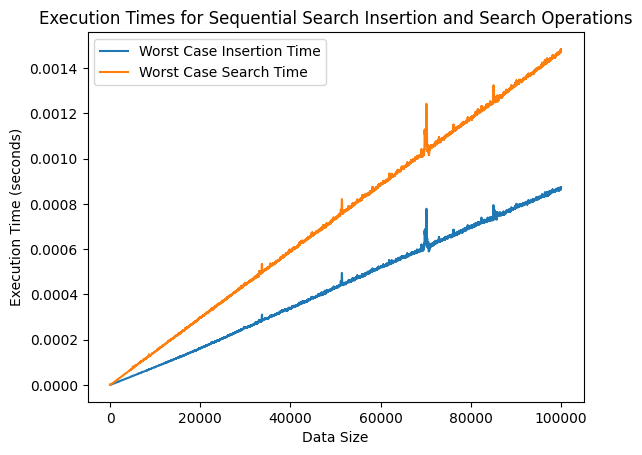

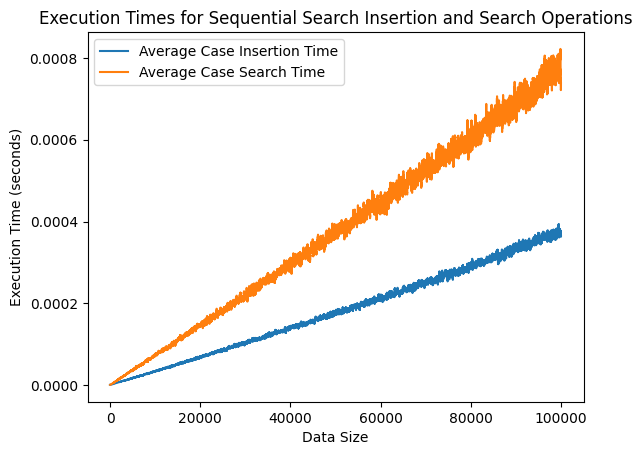

a
aa
aaa
aaagkftxq
aaagwkwcev
aaaqfrb
aaayxfk
aaazsmcwa
aab
aabmslugk
aabwjhult
aacavohw
aacbdgeaw
aacfbkap
aachmdlcua
aacjaojn
aacsx
aadhmst
aadhympjz
aadjnsbwn
aadkrgis
aadoji
aadyifgn
aadzb
aaearq
aaeqkdoqg
aaeqpn
aaesip
aaf
aaffj
aafqbisfwl
aafrjj
aafsk
aafyt
aagaxrp
aaggr
aagkm
aagkpimie
aagznxlrs
aah
aahbscnmjw
aahcducd
aahcelxc
aahgcz
aahuuvonwx
aahymj
aahzn
aaipggxzk
aaiwtruv
aajfywxxg
aajmor
aajpub
aajpwf
aajwfh
aajyexk
aakhvl
aakjef
aakjjb
aakryspvrk
aaku
aakwzk
aakyd
aal
aam
aamatdu
aambje
aamfdsfhto
aamkosuuso
aampxsu
aamrpt
aams
aamsnuojkd
aanfzu
aanldei
aannerhtc
aanttavqcl
aanwy
aaobuagiux
aaodobrm
aaolpncl
aaowx
aapj
aapltod
aapt
aapttwkzc
aaqotog
aaqrjfp
aaqtdbwsmu
aaqyqr
aaqyreurrk
aar
aarfswg
aarlp
aarmlojtn
aarpb
aarqxpim
aarskeizth
aas
aasd
aasovmvz
aastu
aasvu
aasvuet
aatbni
aathbu
aato
aatqisnyxv
aatxawwv
aatzoybjv
aau
aaufdc
aaupeqce
aavcyswiec
aavdrgunf
aavi
aavo
aavrw
aavsqhm
aaw
aawpipnda
aawscpoa
aaxfawqyu
aaxgn
aaxi
aaxkmvuf
aay
aaynhwbt
aays
aaysskwf
aayuo

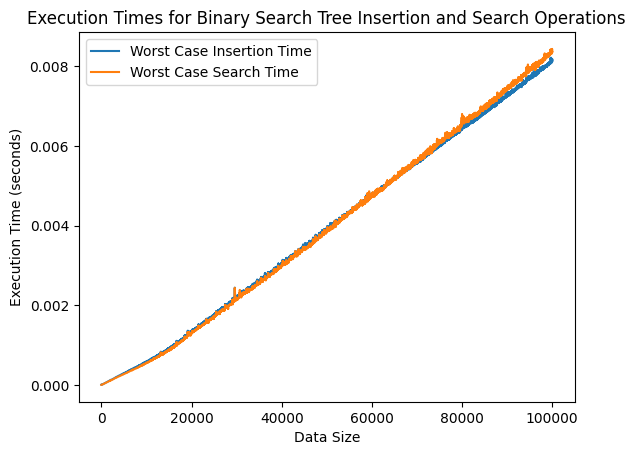

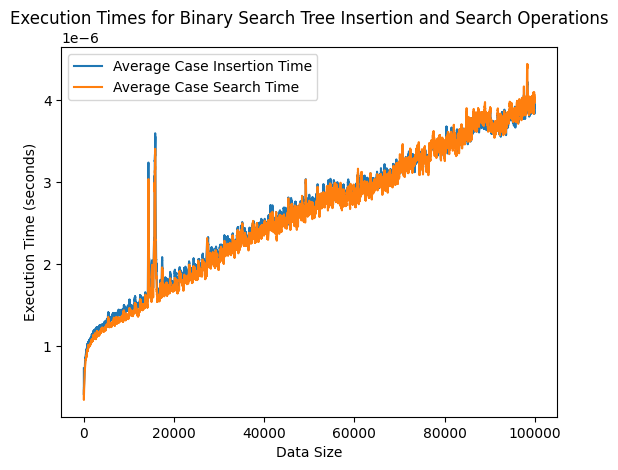

a
a
aaa
aaa
aaalpe
aaalpe
aabagatxic
aabagatxic
aabjjfuurg
aabjjfuurg
aabs
aabs
aach
aach
aacsikq
aacsikq
aacvsxut
aacvsxut
aad
aad
aadavgdjd
aadavgdjd
aadrsd
aadrsd
aae
aae
aaelieiqox
aaelieiqox
aaesosx
aaesosx
aafmnzrtj
aafmnzrtj
aafqzcy
aafqzcy
aagnpq
aagnpq
aagvnfwrb
aagvnfwrb
aahbrb
aahbrb
aahdzijljz
aahdzijljz
aahlib
aahlib
aahpvbqh
aahpvbqh
aahzwa
aahzwa
aaicfpx
aaicfpx
aaigqmoxi
aaigqmoxi
aajdkyaxe
aajdkyaxe
aajs
aajs
aajtsizkeq
aajtsizkeq
aakbeyoxem
aakbeyoxem
aakjwt
aakjwt
aakq
aakq
aalfb
aalfb
aalnipogq
aalnipogq
aalxncwu
aalxncwu
aamim
aamim
aan
aan
aanep
aanep
aanognr
aanognr
aanxrkxuy
aanxrkxuy
aaofgkqc
aaofgkqc
aaohy
aaohy
aapgz
aapgz
aapl
aapl
aapzscxch
aapzscxch
aaqahyjte
aaqahyjte
aaqglxmm
aaqglxmm
aaqj
aaqj
aar
aar
aari
aari
aarnadal
aarnadal
aarrawwh
aarrawwh
aasixvjx
aasixvjx
aasttxa
aasttxa
aatbtgglcu
aatbtgglcu
aatnpwcwa
aatnpwcwa
aaubambaca
aaubambaca
aauhecqz
aauhecqz
aaushr
aaushr
aavgl
aavgl
aavibnem
aavibnem
aavufhz
aavufhz
aawsjs
aawsjs
aawxujy
aawxujy
aaxc

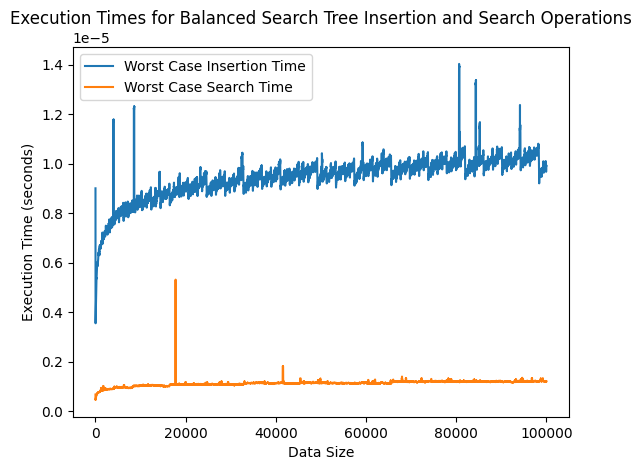

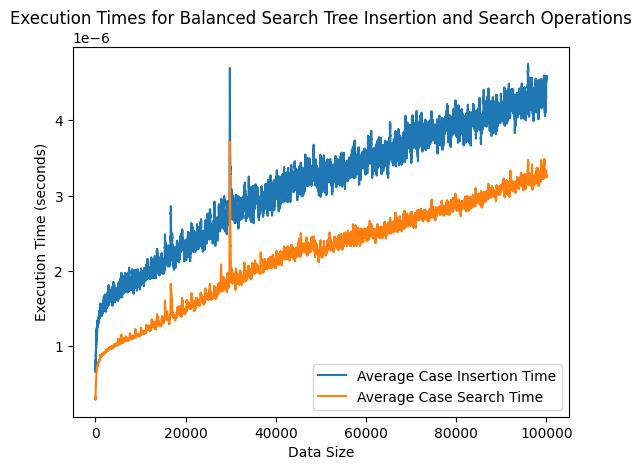

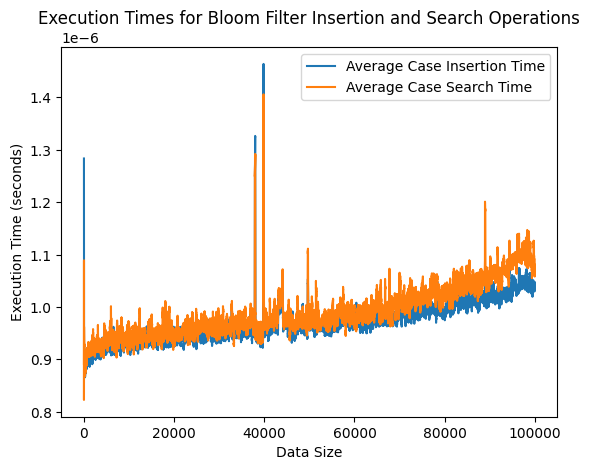

In [58]:
# Graph 1: Average Sequential Insertion and Search Times vs Data Size

plot_worst_case_vs_data_size(SequentialSearchSet(), 'Sequential Search', 100000)
plot_average_case_vs_data_size(SequentialSearchSet(), 'Sequential Search', 100000)

# # Graph 2: Average Binary Insertion and Search Times vs Data Size

plot_worst_case_vs_data_size(BinarySearchTreeSet(), 'Binary Search Tree', 100000)
plot_average_case_vs_data_size(BinarySearchTreeSet(), 'Binary Search Tree', 100000)

# # Graph 3: Average Balanced Insertion and Search Times vs Data Size

plot_worst_case_vs_data_size(BalancedSearchTreeSet(), 'Balanced Search Tree', 100000)
plot_average_case_vs_data_size(BalancedSearchTreeSet(), 'Balanced Search Tree', 100000)

# Graph 4: Average Bloom Filter Insertion and Search Times vs Data Size

plot_average_case_vs_data_size(BloomFilterSet(), 'Bloom Filter', 100000)
